<a href="https://colab.research.google.com/github/YasuharuSuzuki/23_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Section 16 
# Section 16-1 機械学習入門(教科書P.381)

## scikit-learnとは
<img src="https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/doc/logos/scikit-learn-logo.png">

- Scikit-learnはNumPyやSciPyといった数値演算、数値解析ライブラリと組み合わせて使うことが出来る機械学習ライブラリです。
- Scikit-learnはSVMやRandomForest、Gradient Boosting、k-NN、DBSCANといった非常に多くの機械学習アルゴリズムに対応しており、それらを使って分類、回帰、クラスタリングといった様々な機械学習を行うことが可能です。

### Scikit-learnを使うメリット
- 一貫性: Scikit-learnのすべてのクラスは、共通のメソッドを持っています。これにより、学習コストを抑えることが可能です。
- 豊富な機能: 分類、回帰、クラスタリング、次元削減、モデル選択など、非常に多くの機械学習タスクをサポートしています。
- 高度なドキュメンテーション: Scikit-learnの公式ウェブサイトには、各モデルの詳細な説明や、どのように実装すればよいかの具体的なガイドラインがあります。
- 効率性: Scikit-learnは、PythonのNumPyとSciPyという2つの強力なライブラリを基盤としています。これらのライブラリは高度に最適化されており、数学的な計算を効率的に行うことができます。
- 柔軟性: Scikit-learnは、プリプロセッシング、特徴選択、特徴抽出など、機械学習ワークフローの各ステップに役立つツールを提供します。
- コミュニティ: Scikit-learnは世界中のコミュニティに支持されており、新しい機能の開発や問題の解決が頻繁に行われています。

## 参考サイト
### [【Python入門】7-2. scikit-learnライブラリ](https://utokyo-ipp.github.io/7/7-2.html)

### はじめてみよう
- Pandasはデータサイエンティストや機械学習エンジニアが日々の仕事でよく利用するツールであり、Pythonでデータ分析を行う際には必須のライブラリとなっています。
- Scikit-learnは機械学習を扱うデータサイエンティストや研究者にとって、強力で信頼性の高いツールとなっています。
- 今回の講義では、このPandasとScikit-learnを使った機械学習について学んでいきましょう。

## サンプルプログラム1　ワイン分類を行う

### ライブラリのimport

In [1]:
import pandas as pd # pandasモジュールを読み込む（データ分析ライブラリ）
import numpy as np # NumPyモジュールを読み込む（数値演算ライブラリ）
import matplotlib.pyplot as plt # matplotlib.pyplot モジュールを読み込む（可視化ライブラリ。細かいカスタマイズが可能）
import seaborn as sns # Seabornモジュールを読み込む（可視化ライブラリ。pairplotなど多くのデータ分析情報をplotするのに向いている）

from sklearn import svm # scikit-learnのSVM(サポートベクターマシン)
from sklearn.model_selection import train_test_split # scikit-learnの訓練データ / テストデータ 分割ライブラリ
from sklearn import metrics # scikit-learnの精度算出用ライブラリ
from sklearn.ensemble import RandomForestClassifier # scikit-learnのRandomForest(ランダムフォレスト)

from imblearn.over_sampling import SMOTE  # 不均衡データサンプリングライブラリ
from mpl_toolkits.axes_grid1 import Divider, Size # matplotlib 領域修正用クラス
from mpl_toolkits.axes_grid1.mpl_axes import Axes # matplotlib 領域修正用クラス

### 定数の定義
- データファイルパスを定義しておきます
- データ読み込みの際にご使用してください。修正は不要です

In [2]:
# データファイルパス定義
WINE_CSV = "./data/wine.csv"

### サンプルプログラム1-1　ワインのデータセットを読み込む

In [3]:
# ワインのデータセットを読み込み
df_wine = pd.read_csv(WINE_CSV, index_col=None) # indexに使用するカラムが無いため、index_col=Noneを指定します

### サンプルプログラム1-2　読み込んだDataFrameを確認

In [4]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  targe

In [6]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [7]:
df_wine.target.value_counts()

target
2    71
1    59
3    48
Name: count, dtype: int64

### サンプルプログラム1-3　SVCで分類モデルを作る

In [8]:
# 説明変数と目的変数に分ける
X = df_wine.iloc[:,:-1]
y = df_wine.iloc[:,-1]

In [9]:
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 特に理由がない限りは、学習データ：テストデータは 7：3 でわけましょう。
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)  # stratifyを指定すると層別にきれいに分けることができます

In [10]:
# 学習する
svc_model = svm.SVC()    # モデルを作る
svc_model.fit(X_train, y_train)    # 訓練する

SVC()

### サンプルプログラム1-4　SVCで正答率と誤った個数を算出する

In [11]:
accuracy = svc_model.score(X_test, y_test)    # 正答率を調べる
print(f"正答率 = {accuracy}")

predicted = svc_model.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

正答率 = 0.7777777777777778
誤った個数：12


### サンプルプログラム1-5　学習済みSVCモデルの分類レポート(classification report)を作成する

In [12]:
# 分類レポート
print("classification report")
report = metrics.classification_report(y_test, predicted, output_dict=True)
pd.DataFrame(report).T

classification report


,precision,recall,f1-score,support
1,0.894737,0.894737,0.894737,19.000000
2,0.740741,0.909091,0.816327,22.000000
3,0.625000,0.384615,0.476190,13.000000
accuracy,0.777778,0.777778,0.777778,0.777778
macro avg,0.753493,0.729481,0.729085,54.000000
weighted avg,0.767061,0.777778,0.762031,54.000000


- precision(適合率) --- 正解と予測したもののうち、正しかった確率
- recall(再現率) --- 実際に正解のデータのうち、どれだけ正解と予測できたかを示す確率
- f1-score --- PrecisionとRecall の調和平均

### サンプルプログラム1-6　学習済みSVCモデルで混合行列(confusion matrix)を表示する

In [13]:
result_labels = list(df_wine["target"].unique())
result_labels

[np.int64(1), np.int64(2), np.int64(3)]

confusion matrix


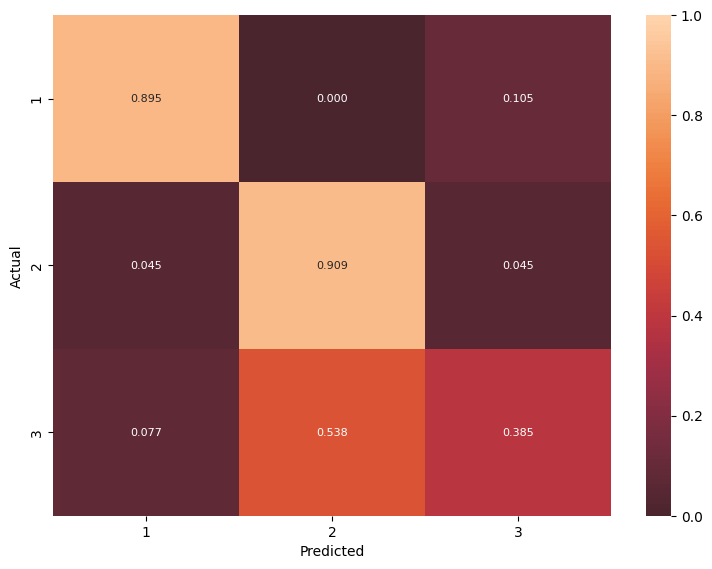

In [14]:
# 混合行列
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, predicted)

# 割合で表示したいので値を変換する
cm2 = cm.copy().astype(np.float64)
for y_index in range(len(cm2)):
    cm2[y_index] = (cm2[y_index] / cm2[y_index].sum())

plt.subplots(figsize=(9, 6.5)) # 図の大きさを指定
heatmap = sns.heatmap(cm2, vmin=0, vmax=1, center=-0.25, annot=True, fmt=".3f",  annot_kws={"size":8},
                     xticklabels=result_labels, yticklabels=result_labels) # seabornで可視化する
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## サンプルプログラム1-7　SVCの学習結果を考察してみましょう

### 考察
- classification_reportをみると品種3のf1-scoreが0.476190と当てられていない
  - 前回のpandasの授業ではclass1とclass3が比較的明確に分かれていたためclass3の精度が悪いのは予想外
  - データが少ない（testデータでは特に13件しかない）のが大きな要因と思われる
- 品種3のrecallが0.385とかなり低いことから、モデルが品種1と品種2を予測するケースが多かったものと思われる
  - 逆に言うと、他のモデルを使用したり、データの渡し方次第で改善できる可能性はある
- 考えられる対策
  - 不均衡データの是正
  - モデルの変更

In [15]:
y_train.value_counts()

target
2    49
1    40
3    35
Name: count, dtype: int64

## サンプルプログラム1-8. RandomForestClassifierで分類モデルを作る

In [16]:
# SMOTEを使用して不均衡データを水増しする
value_counts = y_train.value_counts()
max_count = max(y_train.value_counts().values)
smote_ratio = {index : max_count for index, value in value_counts.items()}
smote_ratio

{2: np.int64(49), 1: np.int64(49), 3: np.int64(49)}

In [17]:
smote = SMOTE(sampling_strategy=smote_ratio, random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [18]:
# 揃えた
y_train_resampled.value_counts()

target
1    49
2    49
3    49
Name: count, dtype: int64

In [19]:
# RandomForestで学習させる
rf_model = RandomForestClassifier(max_depth=3)    # max_depth のパラメータを指定する
rf_model.fit(X_train_resampled, y_train_resampled)     # 訓練データと教師データで学習する

RandomForestClassifier(max_depth=3)

## サンプルプログラム1-9. RandomForestClassifierで正答率と誤った個数を算出する

In [20]:
# モデルの学習結果を評価する
accuracy = rf_model.score(X_test, y_test)    # テストデータで試す
print(f"正答率 = {accuracy}")

predicted = rf_model.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

正答率 = 0.9814814814814815
誤った個数：1


### サンプルプログラム1-10　学習済みRandomForestClassifierモデルの分類レポート(classification report)を作成する

In [21]:
# 分類レポート
print("classification report")
report = metrics.classification_report(y_test, predicted, output_dict=True)
pd.DataFrame(report).T

classification report


,precision,recall,f1-score,support
1,0.950000,1.000000,0.974359,19.000000
2,1.000000,0.954545,0.976744,22.000000
3,1.000000,1.000000,1.000000,13.000000
accuracy,0.981481,0.981481,0.981481,0.981481
macro avg,0.983333,0.984848,0.983701,54.000000
weighted avg,0.982407,0.981481,0.981504,54.000000


### サンプルプログラム1-11　学習済みRandomForestClassifierモデルの混合行列(confusion matrix)を表示する

confusion matrix


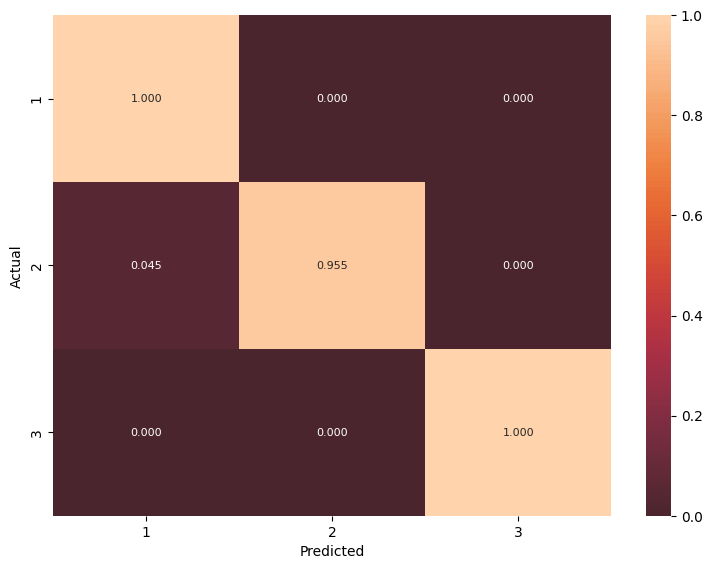

In [22]:
# 混合行列
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, predicted)

# 割合で表示したいので値を変換する
cm2 = cm.copy().astype(np.float64)
for y_index in range(len(cm2)):
    cm2[y_index] = (cm2[y_index] / cm2[y_index].sum())

plt.subplots(figsize=(9, 6.5)) # 図の大きさを指定
heatmap = sns.heatmap(cm2, vmin=0, vmax=1, center=-0.25, annot=True, fmt=".3f",  annot_kws={"size":8},
                     xticklabels=result_labels, yticklabels=result_labels) # seabornで可視化する
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### サンプルプログラム1-12　学習済みRandomForestClassifierモデルのFeatureImportanceを表示する
- FeatureImportanceとは目的変数の分類にどの程度寄与しているかを示す指標です
- 決定木系のモデルでしか使用できません

In [23]:
def _convert_column_name_for_feature_importance(columns):
    new_columns = []
    for name_src in columns:
        new_columns.append(name_src)

    return new_columns

# figureをmargin付きで作成する
def _make_figure_with_margin(ax_w_px=400, ax_h_px=300, ax_margin_px = (50, 50, 50, 50), fig_dpi=100):

    # サイズ指定のための処理 ↓↓ ここから ↓↓ 
    ax_w_inch = ax_w_px / fig_dpi
    ax_h_inch = ax_h_px / fig_dpi
    ax_margin_inch = (ax_margin_px[0] / fig_dpi,
                      ax_margin_px[1] / fig_dpi,
                      ax_margin_px[2] / fig_dpi,
                      ax_margin_px[3] / fig_dpi)  # Left,Top,Right,Bottom [inch]

    fig_w_inch = ax_w_inch + ax_margin_inch[0] + ax_margin_inch[2] 
    fig_h_inch = ax_h_inch + ax_margin_inch[1] + ax_margin_inch[3]

    fig = plt.figure(dpi=fig_dpi, figsize=(fig_w_inch, fig_h_inch))
    ax_p_w = [Size.Fixed(ax_margin_inch[0]),Size.Fixed(ax_w_inch)]
    ax_p_h = [Size.Fixed(ax_margin_inch[1]),Size.Fixed(ax_h_inch)]
    divider = Divider(fig, (0.0, 0.0, 1.0, 1.0), ax_p_w, ax_p_h, aspect=False)
    ax = Axes(fig, divider.get_position())
    ax.set_axes_locator(divider.new_locator(nx=1,ny=1))
    fig.add_axes(ax)
    return fig, ax

# FeatureImportanceをplotする
def _plot_feature_importances(x_column_names, best_estimator):
    importances = pd.DataFrame(
        {"features": _convert_column_name_for_feature_importance(x_column_names),
         "importances": best_estimator.feature_importances_})

    importances = importances[importances['importances'] != 0] # 重要度ゼロのものは表示しない
    importances.sort_values(by="importances", inplace=True, ignore_index=True, ascending=True)
    
    fig, ax = _make_figure_with_margin(800, 100+50*len(importances), ax_margin_px = (150, 50, 50, 50))
    plt.barh(importances['features'], importances['importances'])
    plt.title("Feature Importances (Zero variables are hidden)", fontsize=14)
    plt.show()

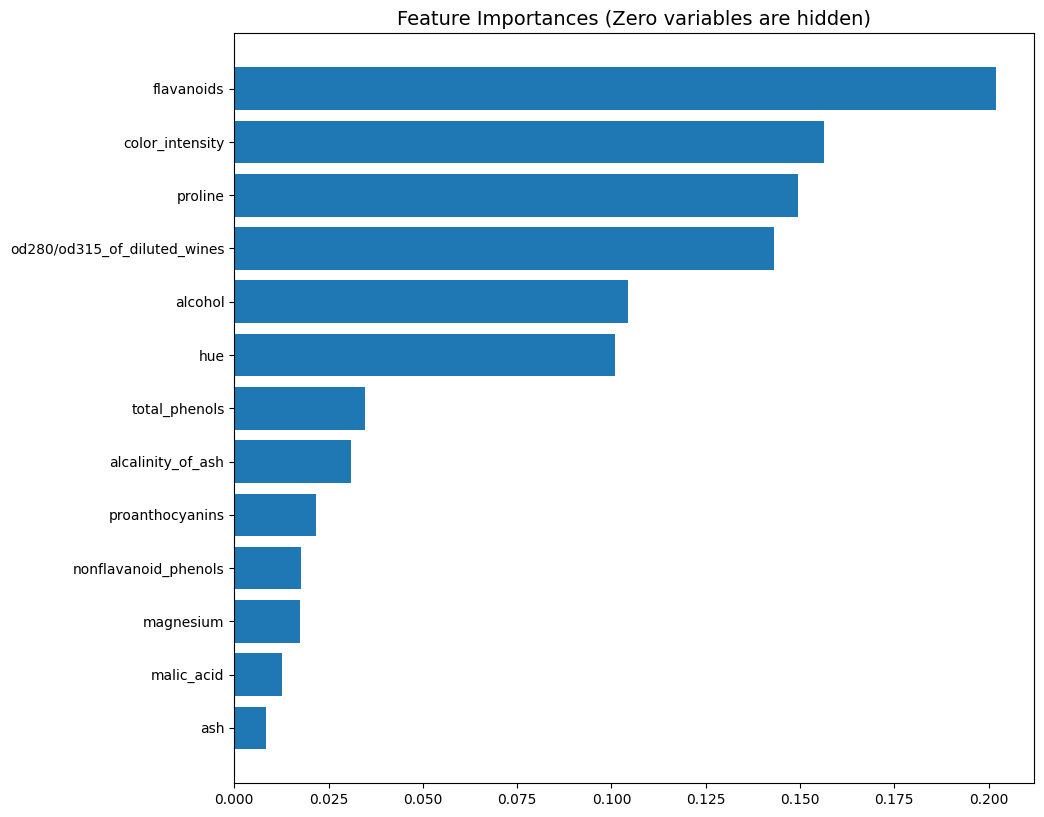

In [24]:
_plot_feature_importances(X_train.columns, rf_model)

## サンプルプログラム1-13　RandomForestClassifierの学習結果を考察してみましょう

- 不正解データが1件のみとなった
  - 結果としては良さそうに見えるが、過学習の可能性もある
  - 特にRandomForestのように木構造の非線形モデルでは学習データのバリエーションが少ないと過学習を起こしやすい
- 考えられる対策
  - 可能であればデータ量を増やす
    - どうやらこのデータのより大きなデータセットは存在しない様子
    - 実際のデータサイエンスの現場であれば、より多くのデータを収集する活動を行う等の対策を行う

---
---
---
---
---